In [65]:
# Import libraries
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [66]:
df_CocaCola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx", header=0, index_col=0, parse_dates=True)

In [67]:
df_CocaCola

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [68]:
df_CocaCola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


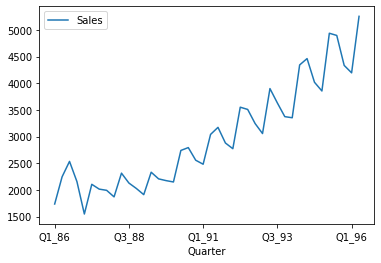

In [69]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
df_CocaCola.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

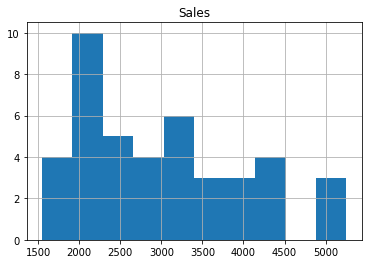

In [70]:
df_CocaCola.hist()

<AxesSubplot:ylabel='Density'>

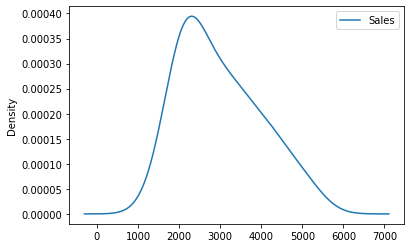

In [71]:
df_CocaCola.plot(kind='kde')

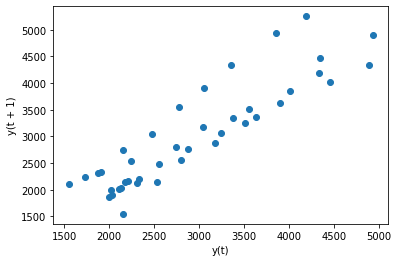

In [72]:
# Lag plot
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(df_CocaCola)
pyplot.show()

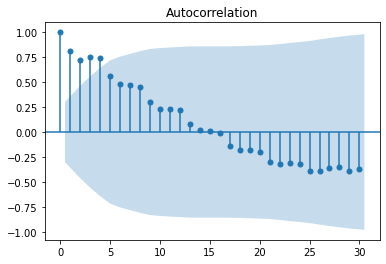

In [73]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_CocaCola,lags=30)
pyplot.show()

In [74]:
df_CocaCola["t"] = np.arange(1,43)
df_CocaCola["t_sq"] = df_CocaCola["t"]*df_CocaCola["t"]
df_CocaCola["log_sales"] = np.log(df_CocaCola["Sales"])
df_CocaCola

,Sales,t,t_sq,log_sales
Quarter,,,,
Q1_86,1734.827000,1,1,7.458663
Q2_86,2244.960999,2,4,7.716443
Q3_86,2533.804993,3,9,7.837477
Q4_86,2154.962997,4,16,7.675529
Q1_87,1547.818996,5,25,7.344602
Q2_87,2104.411995,6,36,7.651791
Q3_87,2014.362999,7,49,7.608058
Q4_87,1991.746998,8,64,7.596767
Q1_88,1869.049999,9,81,7.533186


In [75]:
#splitting data
Train = df_CocaCola.head(35)
Test = df_CocaCola.tail(7)

# Forecasting Using Model Based Method

In [76]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351143

In [77]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

493.34864848421216

In [80]:
Quad = smf.ols('Sales~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

511.811731941731

In [82]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
0,rmse_linear,636.507293
